In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

Зададим требуемое распределение через плотность, такую, что будучи домноженной на x^5 она не интегрируется на R. Чтобы такой интеграл был пятым моментом, требуется, чтобы плотность была четной (матожидание = 0). Ищем плотность в следующем виде: на отрезке [-a, a] она равна константе h, а за пределами этиого отрезка спадает по закону $x^{-6}$. Склеив функции в точках -a и a (потребовав непрерывность плотности) и приравняв к единице интеграл плотности по числовой оси, получим систему: <br>
$\begin{cases}
   \frac{1}{a^6} = h\\
   ah + \int_a^\inf x^{-6}dx
 \end{cases} 
 \rightarrow 
 \begin{cases}
   a = \frac{12}{5}^{\frac{1}{5}}\\
   h = \frac{5}{12}^{\frac{6}{5}}
 \end{cases}$ <br>
 функция распределения, соответственно: <br>
 $F(x) = \begin{cases}
   \frac{1}{5x^5}, &x < -a\\
   \frac{1}{5x^5} + h(x+a), &x \in [-a; a]\\
   \frac{1}{5x^5} + h(x+a) + (\frac{1}{5a^5} - \frac{1}{5x^5}), &x > a
 \end{cases}$ <br>
 <br>
 Генерируем выборку:

In [13]:
a = (12.0/5)**0.2
h = (5.0/12)**(6.0/5)

class density_gen(st.rv_continuous):
    def _pdf(self, x):
        if x < -a or x > a:
            return 1.0/x**6
        else:
            return h
    
dens = density_gen(name = 'not5')
sample = dens.rvs(size=10000)

График плотности:

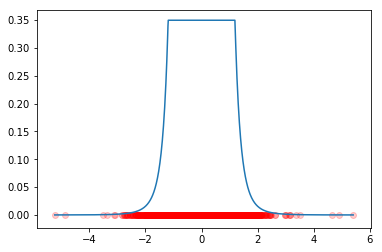

In [14]:
x_row = np.linspace(np.min(sample), np.max(sample), 1000)
y_row = [dens._pdf(x) for x in x_row]
plt.plot(x_row, y_row)
plt.scatter(sample, np.zeros(len(sample)), color='r', alpha=0.2)
plt.show()

График зависимости модуля разности истинной дисперсии (посчитана аналитически) и оценки.

In [17]:
true_disp = 2*(h*a**3/3.0 + 1/(3*a**3))
diff = np.array([np.abs(np.mean(sample[:i]**2) - np.mean(sample[:i])**2 - true_disp) for i in range(len(sample))[1:]])

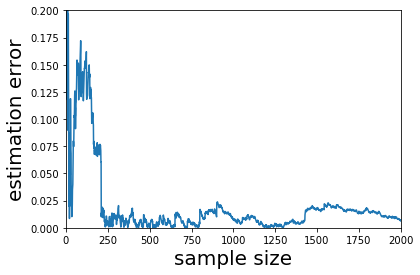

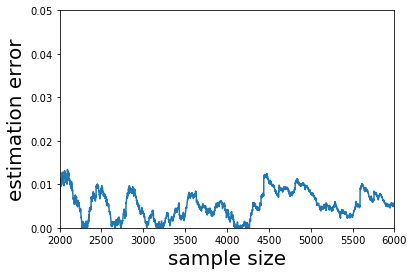

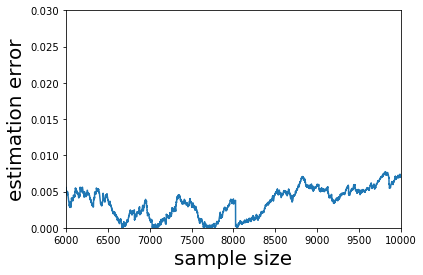

In [20]:
plt.plot(np.arange(len(diff))+1, diff)
plt.axis([0, 2000, 0, 0.2])
plt.xlabel('sample size', fontsize=20)
plt.ylabel('estimation error', fontsize=20)
plt.show()

plt.plot(np.arange(len(diff))+1, diff)
plt.xlabel('sample size', fontsize=20)
plt.ylabel('estimation error', fontsize=20)
plt.axis([2000, 6000, 0, 0.05])
plt.show()

plt.plot(np.arange(len(diff))+1, diff)
plt.xlabel('sample size', fontsize=20)
plt.ylabel('estimation error', fontsize=20)
plt.axis([6000, 10000, 0, 0.03])
plt.show()

Аналогично исследуем распределение Коши. Генерируем выборку, строим график плотности:

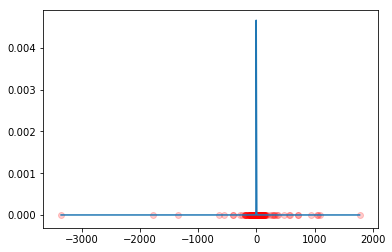

In [29]:
cauchy = st.cauchy()
sample = cauchy.rvs(size=10000)
x_row = np.linspace(np.min(sample), np.max(sample), 1000)
y_row = [dens._pdf(x) for x in x_row]
plt.plot(x_row, y_row)
plt.scatter(sample, np.zeros(len(sample)), color='r', alpha=0.2)
plt.show()

Считаем выборочную дисперсию:

In [30]:
diff = np.array([np.mean(sample[:i]**2) - np.mean(sample[:i])**2 for i in range(len(sample))[1:]])

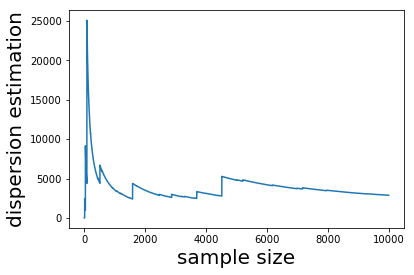

In [34]:
plt.plot(np.arange(len(diff))+1, diff)
plt.xlabel('sample size', fontsize=20)
plt.ylabel('dispersion estimation', fontsize=20)
plt.show()